In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
%matplotlib inline

In [2]:
# File and folder paths- path to where raster files are
# dirpath = "/Volumes/Ehsan-7757225325/2016/july_2016/predict_roughness_k_zero_npts_10/2016_7_rasters_noDataNeg99_TiffFileFloat64_max_geographicalMesh_withLatLonList_withAM/small_samples"
dirpath = "/Users/ehsanmos/MLP_dataset/test_AM_crossing"



# out_fp = os.path.join(dirpath, "final_mosaic_rasterio_july2016_test_AMcrossingBlocks.tif")
out_fp = os.path.join(dirpath, "mosaic_rasterio_july2016_test_AMcrossingBlocks.tif")


# Make a search criteria to select the DEM files
search_criteria = 'raster_path_*'+'*_reprojToEPSG_3995.tif'
q = os.path.join(dirpath, search_criteria)
print(q)
os.path.isdir(dirpath)


/Users/ehsanmos/MLP_dataset/test_AM_crossing/raster_path_**_reprojToEPSG_3995.tif


True

In [3]:
# glob function can be used to list files from a directory with specific criteria
dem_fps = glob.glob(q)

# Files that were found:
len(dem_fps)

41

In [4]:
# List for the source files
src_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in dem_fps:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

# src_files_to_mosaic

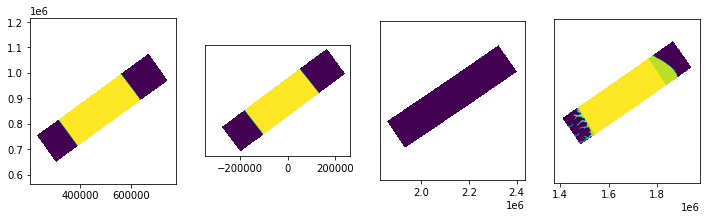

In [5]:
# Create a visual of 4 plots next to each other

import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)


In [6]:
# # Merge function returns a single mosaic array and the transformation info
# mosaic, out_trans = merge(src_files_to_mosaic)#, method='max')

# # Plot the result
# show(mosaic, cmap='terrain')

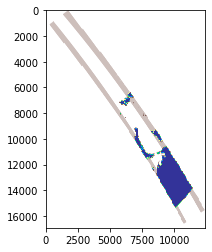

<AxesSubplot:>

In [7]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic, method='max')

# Plot the result
show(mosaic, cmap='terrain')

In [8]:
out_trans

Affine(307.66244926676063, 0.0, -799372.3486124503,
       0.0, -307.66244926676063, 2302455.3904690905)

In [9]:
# Copy the metadata
out_meta = src.meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans})

In [10]:
# Write the mosaic raster to disk
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)

In [11]:
print(out_fp)

/Users/ehsanmos/MLP_dataset/test_AM_crossing/mosaic_rasterio_july2016_test_AMcrossingBlocks.tif
